# PROJECT 3A_RTS: Big data analysis of an electricity power consumption (Tetouan Town - Morocco) and visualizing Prediction results

## 1) Import useful libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## 2) Retrieve the dataset

In [2]:
consumptionTetuan=pd.read_csv("Tetuan City power consumption.csv")

In [3]:
zone1 = consumptionTetuan['Zone 1 Power Consumption']
zone2 = consumptionTetuan['Zone 2  Power Consumption'] 
zone3 = consumptionTetuan['Zone 3  Power Consumption']

## 3) Model of K Neighbors regression

In [4]:
model_KNN = KNeighborsRegressor(n_neighbors=5)
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows"]
X = consumptionTetuan[features]
y = zone3


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model_KNN.fit(X_train, y_train)
print(model_KNN.score(X_train, y_train)) # R^2
predictions = model_KNN.predict(X_test)
print(mean_absolute_error(y_test, predictions))

0.6450594623153946
3638.663720102251


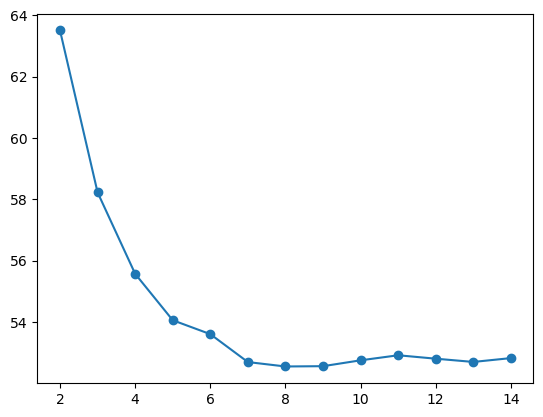

In [5]:
errors = []
for k in range(2,15):
    knn = KNeighborsRegressor(n_neighbors=k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [6]:
# avec heure
consumptionTetuan['DateTime']=pd.to_datetime(consumptionTetuan['DateTime']) 
def conv(data):
    data['month']=data['DateTime'].dt.month
    data['day']=data['DateTime'].dt.day
    data['hour']=data['DateTime'].dt.hour    
    return data

consumptionTetuan = conv(consumptionTetuan)

In [7]:
model_KNN = KNeighborsRegressor(n_neighbors=5)
features=['Temperature', 'Humidity', 'Wind Speed', "general diffuse flows", "diffuse flows", 'hour']
X = consumptionTetuan[features]
y = zone3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model_KNN.fit(X_train, y_train)
print(model_KNN.score(X_train, y_train)) # R^2
predictions = model_KNN.predict(X_test)
print(mean_absolute_error(y_test, predictions))

0.8033236775715314
2490.8345772989696


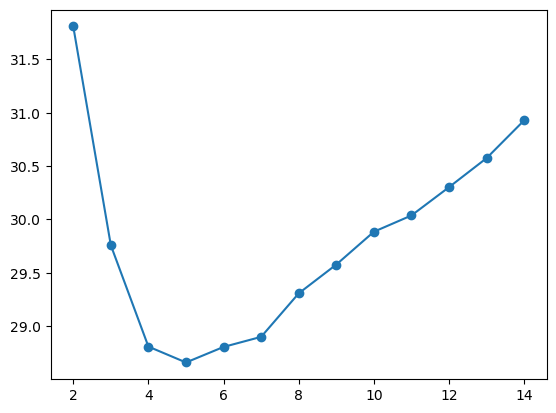

In [8]:
errors = []
for k in range(2,15):
    knn = KNeighborsRegressor(n_neighbors=k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()